<a href="https://colab.research.google.com/github/mgangla/PyData-Analysis/blob/main/visualisationProject_SportsAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import datetime as dt

from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,Team Sky,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
102,103,2016-07-02,Chris Froome,Team Sky,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
103,104,2017-07-01,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
104,105,2018-07-07,Geraint Thomas,Team Sky,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,1986-05-25,NaN,Geraint Howell Thomas,G,Cardiff,Wales,Great Britain


In [ ]:
td_france=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')

In [ ]:
td_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   edition        106 non-null    int64  
 1   start_date     106 non-null    object 
 2   winner_name    106 non-null    object 
 3   winner_team    106 non-null    object 
 4   distance       106 non-null    float64
 5   time_overall   98 non-null     float64
 6   time_margin    98 non-null     float64
 7   stage_wins     106 non-null    int64  
 8   stages_led     106 non-null    int64  
 9   height         66 non-null     float64
 10  weight         67 non-null     float64
 11  age            106 non-null    int64  
 12  born           106 non-null    object 
 13  died           56 non-null     object 
 14  full_name      46 non-null     object 
 15  nickname       74 non-null     object 
 16  birth_town     106 non-null    object 
 17  birth_country  106 non-null    object 
 18  nationalit

convert start date

In [ ]:
td_france.start_date.dtypes

dtype('O')

In [ ]:
td_france['start_date']=pd.to_datetime(td_france['start_date'])

In [ ]:
td_france.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


In [ ]:
td_france.start_date.dtypes

dtype('<M8[ns]')

winner per stage type

What relationship is there between a winners age and the number of stages led.

get winners age

In [ ]:
td_france['born']=pd.to_datetime(td_france['born'])
td_france['died']=pd.to_datetime(td_france['died'])

In [ ]:
td_france.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France


In [ ]:
td_france.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,winners_age
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France,31399 days
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France,20679 days
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,21117 days
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France,10095 days
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,12846 days


In [ ]:
td_france['CALCULATED_AGE'] = (td_france.start_date - td_france.born)/np.timedelta64(1, 'Y')


In [ ]:
td_france.head(3)

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,...,age,born,died,full_name,nickname,birth_town,birth_country,nationality,CALCULATED_AGE,birth_year
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,...,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France,32.326468,1871-03-03
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,...,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France,19.907322,1884-08-04
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,...,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France,24.025134,1881-06-29


<Axes: xlabel='CALCULATED_AGE', ylabel='stages_led'>

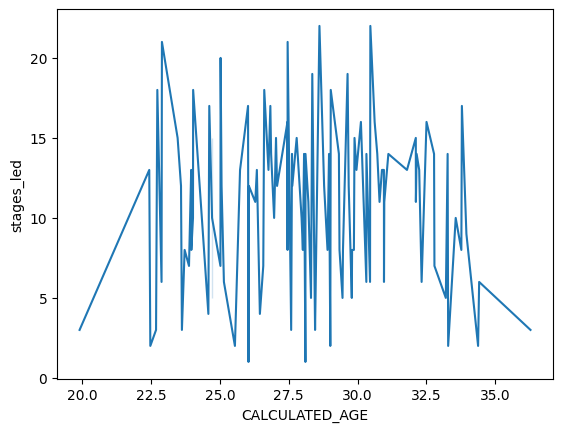

In [ ]:
x=td_france['CALCULATED_AGE']
y=td_france['stages_led']

plt.figuresize=figsize=(14,6)

sns.lineplot(x="CALCULATED_AGE",y="stages_led",data=td_france)

Sort by the most recent winning and find the winner's nationality and display the top. Use this image as inspiration


In [ ]:
winning_ordered=td_france.sort_values("start_date", axis=0, ascending=False, inplace=False)